In [13]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt

import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

**Login

In [14]:
username = "jeroendereu"
password = "***"

In [15]:
api = SentinelAPI(username, password, "https://scihub.copernicus.eu/dhus")

**Basics

In [16]:
product_id_example = "8dd7d819-d02d-42f9-a645-c161851ba2da"

In [17]:
# download single scene by known product id
# api.download(product_id_example)

In [18]:
# Get basic information about the product: its title, file size, MD5 sum, date, footprint and its download url
# api.get_product_odata(product_id_example)

In [19]:
# Get the product's full metadata available on the server
# api.get_product_odata(product_id_example, full=True)

In [20]:
# define footprint = search the data by polygon
footprint_flanders_geojson = geojson_to_wkt(read_geojson("C:/WERKMAP/Anaconda/sentinelsat/footprint_flanders_geojson.geojson"))

In [21]:
footprint_flanders_geojson

'POLYGON ((3.5550000 51.1800000, 3.6500000 51.1800000, 3.6500000 51.1150000, 3.5550000 51.1150000, 3.5550000 51.1800000))'

In [22]:
footprint_coordinates = 'POLYGON ((2.54 51.51, 5.91 51.51, 5.91 50.68, 2.54 50.68, 2.54 51.51))'
# coordinates maximum extent Flanders

In [23]:
footprint_coordinates

'POLYGON ((2.54 51.51, 5.91 51.51, 5.91 50.68, 2.54 50.68, 2.54 51.51))'

In [24]:
# query the data by footprint, time, and keywords
products = api.query(footprint_coordinates, 
                     '20160301', 
                     '20161031', 
                     platformname = 'Sentinel-2', 
                     cloudcoverpercentage = '[0 TO 30]')

In [25]:
# queried data is stored in dictionary
products

OrderedDict([('08910af0-bd52-442a-90f7-347a957212fa',
              {'beginposition': datetime.datetime(2016, 10, 11, 10, 59, 52),
               'cloudcoverpercentage': 2.8062,
               'endposition': datetime.datetime(2016, 10, 11, 11, 2, 23),
               'filename': 'S2A_OPER_PRD_MSIL1C_PDMC_20161011T191935_R094_V20161011T105952_20161011T110223.SAFE',
               'footprint': 'POLYGON ((3.882241291102112 51.44523788480996,3.842014996780675 51.36757258256185,3.7679186166268 51.22352944999936,3.694373268298362 51.07947521391438,3.621398127506265 50.93537811686757,3.548637969398981 50.791229771342365,3.475940591155297 50.64704007789986,3.403822020325847 50.50273805406776,3.383180325547795 50.46125099509305,2.999718211669176 50.46379840175528,2.999712175851301 51.45118220579359,3.882241291102112 51.44523788480996,3.882241291102112 51.44523788480996))',
               'format': 'SAFE',
               'gmlfootprint': '<gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.x

In [40]:
# download all datasets (from query)
# api.download_all(products)

In [42]:
# GeoJSON FeatureCollection containing footprints and metadata of the scenes
geojson_products = api.to_geojson(products)

In [49]:
geojson_products

{"features": [{"geometry": {"coordinates": [[[3.882241291102112, 51.44523788480996], [3.842014996780675, 51.36757258256185], [3.7679186166268, 51.22352944999936], [3.694373268298362, 51.07947521391438], [3.621398127506265, 50.93537811686757], [3.548637969398981, 50.791229771342365], [3.475940591155297, 50.64704007789986], [3.403822020325847, 50.50273805406776], [3.383180325547795, 50.46125099509305], [2.999718211669176, 50.46379840175528], [2.999712175851301, 51.45118220579359], [3.882241291102112, 51.44523788480996], [3.882241291102112, 51.44523788480996]]], "type": "Polygon"}, "id": 0, "properties": {"beginposition": "2016-10-11T10:59:52.000000Z", "cloudcoverpercentage": 2.8062, "endposition": "2016-10-11T11:02:23.000000Z", "filename": "S2A_OPER_PRD_MSIL1C_PDMC_20161011T191935_R094_V20161011T105952_20161011T110223.SAFE", "format": "SAFE", "id": "08910af0-bd52-442a-90f7-347a957212fa", "identifier": "S2A_OPER_PRD_MSIL1C_PDMC_20161011T191935_R094_V20161011T105952_20161011T110223", "inge

In [20]:
# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
api.to_geodataframe(products)

,summary,uuid,filename,format,identifier,instrumentshortname,sensoroperationalmode,instrumentname,s2datatakeid,platformidentifier,...,beginposition,endposition,cloudcoverpercentage,link,link_alternative,link_icon,title,orbitnumber,relativeorbitnumber,geometry
08910af0-bd52-442a-90f7-347a957212fa,"Date: 2016-10-11T10:59:52Z, Instrument: MSI, M...",08910af0-bd52-442a-90f7-347a957212fa,S2A_OPER_PRD_MSIL1C_PDMC_20161011T191935_R094_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20161011T191935_R094_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20161011T105952_006812_N02.04,2015-000A,...,2016-10-11 10:59:52,2016-10-11 11:02:23,2.806200,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20161011T191935_R094_...,6812,94,"POLYGON ((3.882241291102112 51.44523788480996,..."
25b2f3fa-f246-43e2-af4e-046569381810,"Date: 2016-05-04T10:59:17Z, Instrument: MSI, M...",25b2f3fa-f246-43e2-af4e-046569381810,S2A_OPER_PRD_MSIL1C_PDMC_20160504T225029_R094_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160504T225029_R094_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160504T105622_004524_N02.02,2015-000A,...,2016-05-04 10:59:17,2016-05-04 10:59:17,2.173371,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160504T225029_R094_...,4524,94,"POLYGON ((-1.6148262668233 49.64443670244057, ..."
317db6d1-1653-4947-b067-d77dd1db017d,"Date: 2016-06-07T10:40:26Z, Instrument: MSI, M...",317db6d1-1653-4947-b067-d77dd1db017d,S2A_OPER_PRD_MSIL1C_PDMC_20160608T024107_R008_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160608T024107_R008_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160607T104032_005010_N02.02,2015-000A,...,2016-06-07 10:40:26,2016-06-07 10:40:26,24.552967,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160608T024107_R008_...,5010,8,"POLYGON ((2.999723171014824 49.60773992010596,..."
36871bc0-b115-4dd8-9830-392619fc9e25,"Date: 2016-05-01T10:53:10Z, Instrument: MSI, M...",36871bc0-b115-4dd8-9830-392619fc9e25,S2A_OPER_PRD_MSIL1C_PDMC_20160501T194633_R051_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160501T194633_R051_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160501T105032_004481_N02.01,2015-000A,...,2016-05-01 10:53:10,2016-05-01 10:53:10,9.818175,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160501T194633_R051_...,4481,51,POLYGON ((-0.231485194959582 49.61961011420237...
491093da-a5eb-429d-a1ac-623e4e7a5578,"Date: 2016-07-07T10:40:25Z, Instrument: MSI, M...",491093da-a5eb-429d-a1ac-623e4e7a5578,S2A_OPER_PRD_MSIL1C_PDMC_20160707T174444_R008_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160707T174444_R008_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160707T104022_005439_N02.04,2015-000A,...,2016-07-07 10:40:25,2016-07-07 10:40:25,26.965407,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160707T174444_R008_...,5439,8,"POLYGON ((2.999723171014824 49.60773992010596,..."
4b358871-7e03-4c98-9248-42f62d70dbc5,"Date: 2016-09-08T10:50:22Z, Instrument: MSI, M...",4b358871-7e03-4c98-9248-42f62d70dbc5,S2A_OPER_PRD_MSIL1C_PDMC_20160921T193747_R051_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160921T193747_R051_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160908T105022_006340_N02.04,2015-000A,...,2016-09-08 10:50:22,2016-09-08 10:54:16,8.287079,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160921T193747_R051_...,6340,51,"POLYGON ((0.8570853298500

**jp2 naar geotiff

In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import rasterio

In [48]:
input_directory = "C:/WERKMAP/Anaconda/sentinelsat/"

In [50]:
for path in glob(os.path.join(input_directory,"**", "test.jp2"),recursive=True):
    print(path)

C:/WERKMAP/Anaconda/sentinelsat\test.jp2


In [51]:
from osgeo import gdal

In [2]:
infile = 'C:/WERKMAP/Anaconda/sentinelsat/test.jp2'

In [8]:
with rasterio.open("C:/WERKMAP/Anaconda/sentinelsat/test.jp2") as oostvl:
    img = oostvl.read(1)

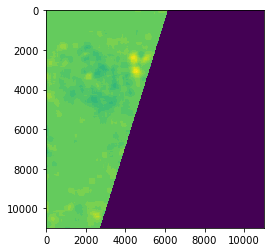

In [9]:
plt.imshow(img)

In [79]:
outfile = 'C:/WERKMAP/Anaconda/sentinelsat/test.tif'

In [82]:
infile.plot()

AttributeError: 'str' object has no attribute 'plot'

In [77]:
for path in glob(os.path.join(input_directory,"**", "*.jp2"),recursive=True):
    basename = os.path.basename(path)
    filename, file_extention = os.path.splitext(basename)
    outfile = os.path.join(input_directory,"**", filename, "*.tif")
    in_image = gdal.Open(path)
    driver = gdal.GetDriverByName("GTiff")
    out_image = driver.CreateCopy(outfile, in_image)
    in_image = None
    out_image = None

ValueError: Received a NULL pointer.

In [58]:
in_image = gdal.Open("C:/WERKMAP/Anaconda/sentinelsat/test.jp2")

driver = gdal.GetDriverByName("GTiff")

out_image = driver.CreateCopy("C:/WERKMAP/Anaconda/sentinelsat/test.gtiff", in_image, 0)

in_image = None
out_image = None

ValueError: Received a NULL pointer.

**Clippen